<a href="https://colab.research.google.com/github/GilangAngga12/pcd/blob/main/Final_SLP_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# **PREPROCESSING**

In [ ]:
# Membaca data
df = pd.read_csv("/content/sample_data/valorant_match_clsfc.csv")
df.head(5)

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,04/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,04/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


In [ ]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

Diperlukan encode untuk dtype = object

In [ ]:
# Membuat salinan dataframe agar data asli tetap aman
df_encoded = df.copy()

# Melakukan encoding untuk semua kolom bertipe object
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

df_encoded.head(5)

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,8,28,3,1,0,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,8,29,3,6,0,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,8,188,5,7,1,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,8,188,2,1,0,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,8,188,3,5,0,1,13,6,14,3,0.4,-75,7,90,146,4


In [ ]:
# Mengecek data yang kosong
df.isnull().sum()

,0
game_id,0
episode,0
act,0
rank,0
date,0
agent,0
map,0
outcome,0
round_wins,0
round_losses,0


Tidak diperlukan mengisi missing value, karena datanya lengkap semua

Jumlah data untuk setiap kategori di kolom 'outcome':
outcome
Loss    500
Win     500
Name: count, dtype: int64


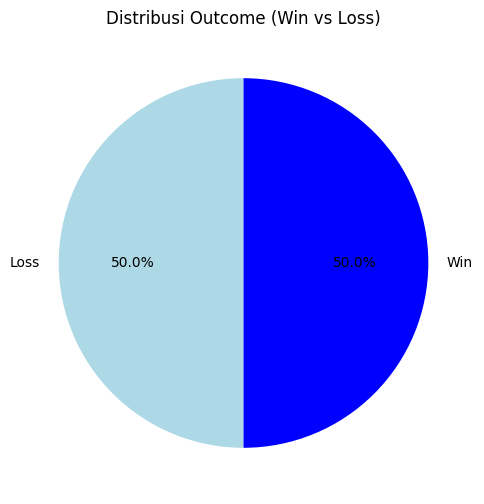

In [ ]:
# Mengecek apakah kolom 'outcome' ada
if 'outcome' in df.columns:
    # Menghitung jumlah Win dan Lose
    outcome_counts = df['outcome'].value_counts()

    # Menampilkan jumlah Win dan Lose
    print("Jumlah data untuk setiap kategori di kolom 'outcome':")
    print(outcome_counts)

    # Visualisasi dengan pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        outcome_counts,
        labels=outcome_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'blue']
    )
    plt.title('Distribusi Outcome (Win vs Loss)')
    plt.show()
else:
    print("Kolom 'outcome' tidak ditemukan pada dataset.")

Data untuk distribusi label sudah balance maka tidak diperlukan balancing data seperti oversampling atau undersampling tidak diperlukan dalam analisis ini.

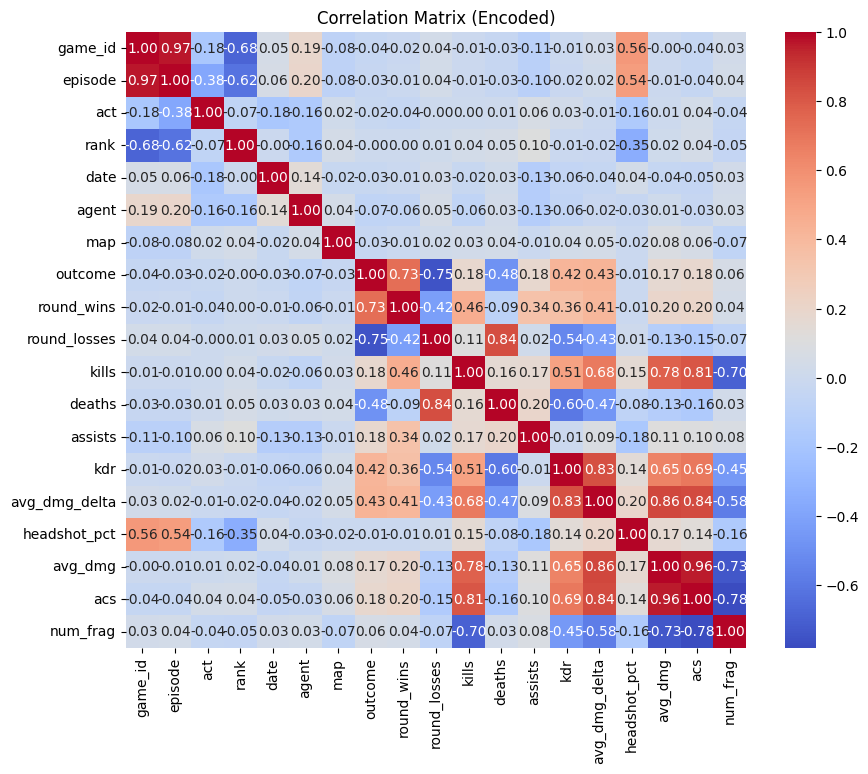

('round_losses',
 'round_wins',
 'deaths',
 'avg_dmg_delta',
 'kdr',
 'kills',
 'assists',
 'acs',
 'avg_dmg')

In [ ]:
# Menghitung matriks korelasi setelah encoding
correlation_matrix = df_encoded.corr()

# Membuat heatmap untuk visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Encoded)')
plt.show()
'round_losses', 'round_wins', 'deaths', 'avg_dmg_delta', 'kdr', 'kills', 'assists', 'acs', 'avg_dmg'

Pemilihan fitur dalam membangun model prediksi untuk memastikan bahwa hanya fitur yang relevan dan memberikan kontribusi signifikan terhadap prediksi yang digunakan sebelum digunakan dalam data train dan data test.

Korelasi dihitung antara semua fitur numerik dan label outcome. Nilai korelasi berkisar dari -1 hingga 1, di mana: Nilai mendekati 1: Menunjukkan hubungan searah yang kuat (fitur mendukung kemenangan, "win"). Nilai mendekati -1: Menunjukkan hubungan berlawanan yang kuat (fitur mendukung kekalahan, "loss").

Sehingga diputuskan untuk menggunakan fitur dengan maksimal 9 yang memiliki korelasi tingi

In [ ]:
# Pisahkan fitur dan label
X = df_encoded[['round_wins', 'kdr', 'avg_dmg_delta', 'round_losses', 'deaths', 'kills', 'assists', 'acs', 'avg_dmg']]
y = df_encoded['outcome']

# Membagi dataset menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Menambahkan kembali label untuk data train
data_train = X_train.copy()
data_train['outcome'] = y_train

# Menambahkan kembali label untuk data train
data_test = X_test.copy()
data_test['outcome'] = y_test

# Simpan sebagai CSV
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

print("Data train disimpan sebagai 'data_train.csv'.")
print("Data test disimpan sebagai 'data_test.csv'.")

Data train disimpan sebagai 'data_train.csv'.
Data test disimpan sebagai 'data_test.csv'.


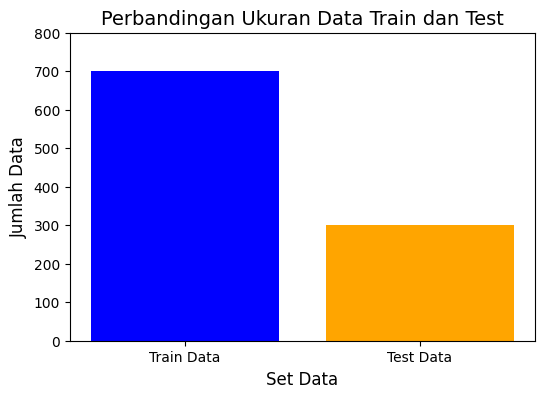

In [ ]:
# Ukuran data train dan test
train_size = len(X_train)
test_size = len(X_test)

# Membuat bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Train Data', 'Test Data'], [train_size, test_size], color=['blue', 'orange'])
plt.title('Perbandingan Ukuran Data Train dan Test', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xlabel('Set Data', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(train_size, test_size) + 100)
plt.show()

Visualisasi perbandingan data train dan test yaitu 700:300

In [ ]:
# Mengecek ukuran data
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (700, 9)
Ukuran data testing: (300, 9)


#**Data Test dan Data Train**

In [ ]:
# Membaca data train
data_train = pd.read_csv("/content/data_train.csv")
X_train = data_train.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir
y_train = data_train.iloc[:, -1].values  # Kolom terakhir sebagai label
data_train.head(5)

,round_wins,kdr,avg_dmg_delta,round_losses,deaths,kills,assists,acs,avg_dmg,outcome
0,15,0.8,-18,13,20,16,5,183,118,1
1,9,1.5,23,13,12,18,10,230,137,0
2,13,0.8,-29,4,9,7,1,118,67,1
3,12,0.7,-11,14,19,13,6,157,122,0
4,13,1.5,58,7,10,15,7,233,168,1


In [ ]:
# Membaca data test
data_test = pd.read_csv("/content/data_test.csv")
X_test = data_test.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir
y_test = data_test.iloc[:, -1].values  # Kolom terakhir sebagai label
data_test.head(5)

,round_wins,kdr,avg_dmg_delta,round_losses,deaths,kills,assists,acs,avg_dmg,outcome
0,13,1.6,30,7,11,18,8,244,149,1
1,13,4.5,190,2,6,27,8,493,284,1
2,13,2.7,63,9,10,27,5,299,173,1
3,13,1.5,42,9,15,23,4,293,183,1
4,12,0.9,32,14,19,18,7,229,157,0


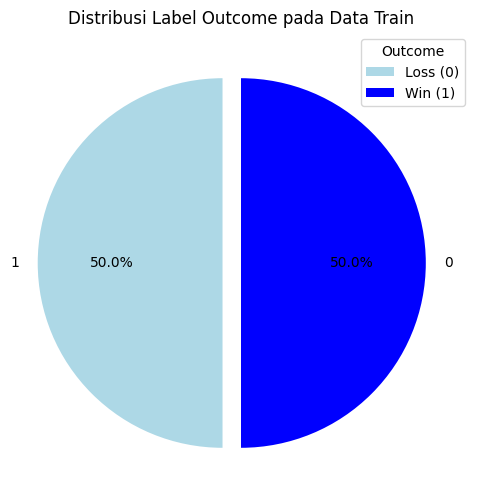

Distribusi Outcome pada Data Train:
Loss (0)    350
Win (1)     350
Name: count, dtype: int64


In [ ]:
# Melihat distribusi label outcome pada data train
outcome_distribution = data_train['outcome'].value_counts()

# Membuat label dengan kategori
labels = ['Loss (0)', 'Win (1)']

# Plot pie chart
plt.figure(figsize=(8, 6))
outcome_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightblue', 'blue'],
    startangle=90,
    explode=(0.1, 0)
)
plt.title('Distribusi Label Outcome pada Data Train')
plt.ylabel('')
plt.legend(title="Outcome", labels=labels, loc="best")
plt.show()

# Menampilkan distribusi secara numerik
print("Distribusi Outcome pada Data Train:")
outcome_distribution.index = labels  # Memberi label pada indeks
print(outcome_distribution)

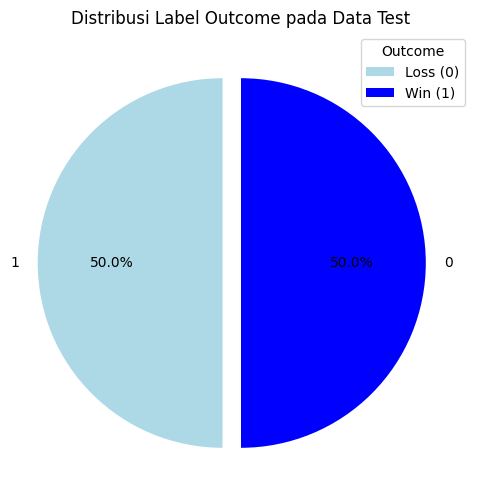

Distribusi Outcome pada Data Test:
Loss (0)    150
Win (1)     150
Name: count, dtype: int64


In [ ]:
# Melihat distribusi label outcome pada data test
outcome_distribution = data_test['outcome'].value_counts()

# Membuat label dengan kategori
labels = ['Loss (0)', 'Win (1)']

# Plot pie chart
plt.figure(figsize=(8, 6))
outcome_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightblue', 'blue'],
    startangle=90,
    explode=(0.1, 0)
)
plt.title('Distribusi Label Outcome pada Data Test')
plt.ylabel('')  # Menghapus label sumbu Y
plt.legend(title="Outcome", labels=labels, loc="best")
plt.show()

# Menampilkan distribusi secara numerik
print("Distribusi Outcome pada Data Test:")
outcome_distribution.index = labels
print(outcome_distribution)

Distribusi label untuk win dan loss sudah balance baik untuk data test maupun train

**Data Test dan Train yang Tidak Dinormalisasi**

In [ ]:
# Membaca data train
data_train = pd.read_csv("/content/data_train.csv")
X_train = data_train.drop(columns=['outcome']).values  # Semua kolom kecuali 'outcome'
y_train = data_train['outcome'].values  # Hanya kolom 'outcome' sebagai label
data_train.head(5)

,round_wins,kdr,avg_dmg_delta,round_losses,deaths,kills,assists,acs,avg_dmg,outcome
0,15,0.8,-18,13,20,16,5,183,118,1
1,9,1.5,23,13,12,18,10,230,137,0
2,13,0.8,-29,4,9,7,1,118,67,1
3,12,0.7,-11,14,19,13,6,157,122,0
4,13,1.5,58,7,10,15,7,233,168,1


In [ ]:
# Membaca data test
data_test = pd.read_csv("/content/data_test.csv")
X_test = data_test.drop(columns=['outcome']).values  # Semua kolom kecuali 'outcome'
y_test = data_test['outcome'].values  # Hanya kolom 'outcome' sebagai label
data_test.head(5)

,round_wins,kdr,avg_dmg_delta,round_losses,deaths,kills,assists,acs,avg_dmg,outcome
0,13,1.6,30,7,11,18,8,244,149,1
1,13,4.5,190,2,6,27,8,493,284,1
2,13,2.7,63,9,10,27,5,299,173,1
3,13,1.5,42,9,15,23,4,293,183,1
4,12,0.9,32,14,19,18,7,229,157,0


**Data Test dan Train yang Dinormalisasi**

In [ ]:
# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada X_train dan X_test
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
X_train_normalized

array([[0.83333333, 0.10344828, 0.32142857, ..., 0.27777778, 0.34117647,
        0.33928571],
       [0.5       , 0.22413793, 0.48412698, ..., 0.55555556, 0.47941176,
        0.42410714],
       [0.72222222, 0.10344828, 0.27777778, ..., 0.05555556, 0.15      ,
        0.11160714],
       ...,
       [0.33333333, 0.05172414, 0.24206349, ..., 0.05555556, 0.22941176,
        0.3125    ],
       [0.55555556, 0.10344828, 0.25396825, ..., 0.27777778, 0.22647059,
        0.19642857],
       [0.72222222, 0.4137931 , 0.76587302, ..., 0.33333333, 0.81470588,
        0.79910714]])

In [ ]:
X_test_normalized

array([[0.72222222, 0.24137931, 0.51190476, ..., 0.44444444, 0.52058824,
        0.47767857],
       [0.72222222, 0.74137931, 1.1468254 , ..., 0.44444444, 1.25294118,
        1.08035714],
       [0.72222222, 0.43103448, 0.64285714, ..., 0.27777778, 0.68235294,
        0.58482143],
       ...,
       [0.5       , 0.10344828, 0.16666667, ..., 0.44444444, 0.24705882,
        0.20089286],
       [0.22222222, 0.18965517, 0.51190476, ..., 0.16666667, 0.8       ,
        0.66964286],
       [0.61111111, 0.06896552, 0.32539683, ..., 0.44444444, 0.29705882,
        0.40178571]])

Link dataset yang sudah dipisah : https://drive.google.com/drive/folders/1pne6VqgZ2kmLSNQ_ibEkG6rCzNBBx7Ep?usp=sharing

#**Pembuatan Perceptron**

###Aktivasi Step

In [ ]:
class SingleLayerPerceptronStep:
    def __init__(self, input_size, learning_rate, epochs, weight_init='random'):
        np.random.seed(40)

        if weight_init == 'random':
            self.weights = np.random.normal(-0.3,0.3, input_size+1)
        elif weight_init == 'normal':
            self.weights = np.random.normal(0, 1, input_size+1)
        elif weight_init == 'xavier':
            self.weights = np.random.normal(0, np.sqrt(1/input_size), input_size+1)
        elif weight_init == 'he':
            self.weights = np.random.normal(0, np.sqrt(2/input_size), input_size+1)
        else:
            raise Exception('Invalid weight initialization provided')

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracy = []
        self.testing_accuracy = []

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            self.training_accuracy.append(self._calculate_accuracy(X_train, y_train))
            self.testing_accuracy.append(self._calculate_accuracy(x_test, y_test))

        training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nTraining Accuracy = {training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(x_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

    def get_weights(self):
        return self.weights

    def get_accuracy(self):
        return [self.training_accuracy, self.testing_accuracy]

In [ ]:
# Buat instance dari kelas
perceptron = SingleLayerPerceptronStep(input_size = 9, learning_rate=0.1, epochs=100)

# Ambil bobot menggunakan metode get_weights()
weights = perceptron.get_weights()

# Print bobot
print("Bobot awal setelah inisialisasi:")
print(weights)

Bobot awal setelah inisialisasi:
[-0.48226431 -0.33784092 -0.50538191 -0.02138558 -0.85332031 -0.44010073
  0.3877471  -0.15335698 -0.0869199   0.01666033]


###Aktivasi Sigmoid

In [ ]:
class SingleLayerPerceptronSigmoid:
    def __init__(self, input_size, learning_rate, epochs, weight_init='random'):
        np.random.seed(40)
        if weight_init == 'random':
            self.weights = np.random.normal(-0.3,0.3, input_size+1)
        elif weight_init == 'normal':
            self.weights = np.random.normal(0, 1, input_size+1)
        elif weight_init == 'xavier':
            self.weights = np.random.normal(0, np.sqrt(1/input_size), input_size+1)
        elif weight_init == 'he':
            self.weights = np.random.normal(0, np.sqrt(2/input_size), input_size+1)
        else:
            raise Exception('Invalid weight initialization provided')

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracy = []
        self.testing_accuracy = []

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))

    def _activation_function_derivative(self, x):
        return self._activation_function(x) * (1 - self._activation_function(x))

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error_derivative = -2 * (label - prediction) * self._activation_function_derivative(prediction)

                self.weights[1:] -= self.learning_rate * error_derivative * inputs
                self.weights[0] -= self.learning_rate * error_derivative

            # Calculate training accuracy at each epoch
            self.training_accuracy.append(self._calculate_accuracy(X_train, y_train))
            self.testing_accuracy.append(self._calculate_accuracy(x_test, y_test))

        training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nTraining Accuracy = {training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(x_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [np.round(self._predict(inputs)).astype(np.int32) for inputs in X_test]
        return np.array(predictions)

    def get_weights(self):
        return self.weights

    def get_accuracy(self):
        return [self.training_accuracy, self.testing_accuracy]

In [ ]:
# Buat instance dari kelas
perceptron = SingleLayerPerceptronSigmoid(input_size= 9, learning_rate=0.1, epochs=100)

# Ambil bobot menggunakan metode get_weights()
weights = perceptron.get_weights()

# Print bobot
print("Bobot awal setelah inisialisasi:")
print(weights)

Bobot awal setelah inisialisasi:
[-0.48226431 -0.33784092 -0.50538191 -0.02138558 -0.85332031 -0.44010073
  0.3877471  -0.15335698 -0.0869199   0.01666033]


#Akurasi Terbaik

###Akurasi Terbaik Data Training

Menggunakan Fungsi Aktivasi Step Function

Data Normalisasi

Learning Rate = 0.01


Training Accuracy = 100.00%
Test Accuracy = 99.00%


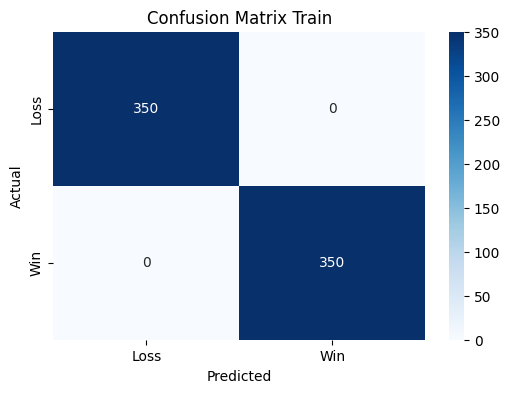

Classification Report Train:
               precision    recall  f1-score   support

        Loss       1.00      1.00      1.00       350
         Win       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [ ]:
# Menginisialisasi dan melatih model SingleLayerPerceptron
input_size = X_train.shape[1]
perceptron = SingleLayerPerceptronStep(input_size, learning_rate=0.01, epochs=100)
perceptron.train(X_train_normalized, y_train, X_test_normalized, y_test)

# Prediksi pada data test
pred = perceptron.predict(X_train_normalized)

# Confusion Matrix
cm = confusion_matrix(y_train, pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title("Confusion Matrix Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Menampilkan Classification Report
class_report = classification_report(y_train, pred, target_names=['Loss', 'Win'])
print("Classification Report Train:\n", class_report)

###Akurasi Terbaik Data Testing

Fungsi Aktivasi Sigmoid

Data Tidak dinormalisasi

Learning Rate = 0.001


Training Accuracy = 99.71%
Test Accuracy = 99.67%


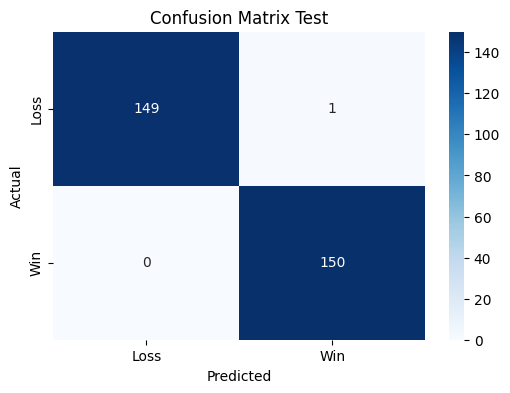

Classification Report Test:
               precision    recall  f1-score   support

        Loss       1.00      0.99      1.00       150
         Win       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
# Menginisialisasi dan melatih model SingleLayerPerceptron
input_size = X_train.shape[1]
perceptron = SingleLayerPerceptronSigmoid(input_size, learning_rate=0.001, epochs=100)
perceptron.train(X_train, y_train, X_test, y_test)

# Prediksi pada data test
pred = perceptron.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title("Confusion Matrix Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Menampilkan Classification Report
class_report = classification_report(y_test, pred, target_names=['Loss', 'Win'])
print("Classification Report Test:\n", class_report)

**Penggunaan Bobot**

Penggunaan bobot menggunakan teknik distribusi normal (Gaussian) dengan rata-rata -0.3 dan deviasi standar 0.3 serta seed yang digunakan 40

Pengaturan seed ini memberikan kestabilan dan memungkinkan reproduksi hasil eksperimen secara konsisten, karena angka acak yang dihasilkan akan selalu sama setiap kali kode dieksekusi dengan seed yang sama.

Bobot akan dipilih secara acak dari distribusi normal dengan nilai rata-rata mendekati -0.3 dan penyebaran nilai sekitar -0.3, dengan ukuran yang disesuaikan untuk jumlah input (input_size) ditambah satu untuk bias (bobot pertama).

Epoch 100 digunakan untuk sleuruh eksperimen.